In [34]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
dataset_path = 'Nepali_News_Classification.csv'
df = pd.read_csv(dataset_path)
df.head()

,headings,paras,label
0,कर्णालीका सुइना,उमेरले ७० कटेका पूर्णबहादुर विश्वकर्मा ७ वर्षी...,entertainment
1,साकुराजस्तो प्रेमकथा,जापान भन्नेबित्तिकै पैंयु साकुरा फूलको चर्चा ह...,entertainment
2,भद्रगोल नै ट्रेन्डिङमा,नेपाल टेलिभिजनबाट हरेक शुक्रबार साँझ प्रसारण ह...,entertainment
3,फेरिए लोकभाका चर्चामा सामाजिक गीत,"दोहोरी भन्नासाथ सोचिन्छ, यो केटा–केटीबीचको जुह...",entertainment
4,भूकम्पले भत्केको सपना,च्यान्टे र मनमायाको स्थानीय परम्पराअनुसार विवा...,entertainment


In [3]:
df = df.drop(df.columns[0], axis=1)

# Shuffle the rows of the DataFrame
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,paras,label
0,सागर ढकालले घातक बलिङ गरेपछि वाइवाइ ग्रेट हिमा...,sports
1,केही घण्टाको काम अनि एक लाख रुपैयाँ पारिश्रमिक...,entertainment
2,भौतिक पूर्वाधार तथा यातायात मन्त्रालयले रेल खर...,business
3,नयाँ वर्षको सुरुवातसँगै शुक्रबारदेखि देशभर तीन...,entertainment
4,चितवन टाइगर्सले आउँदो टीभीएस एभरेस्ट प्रिमियर ...,sports


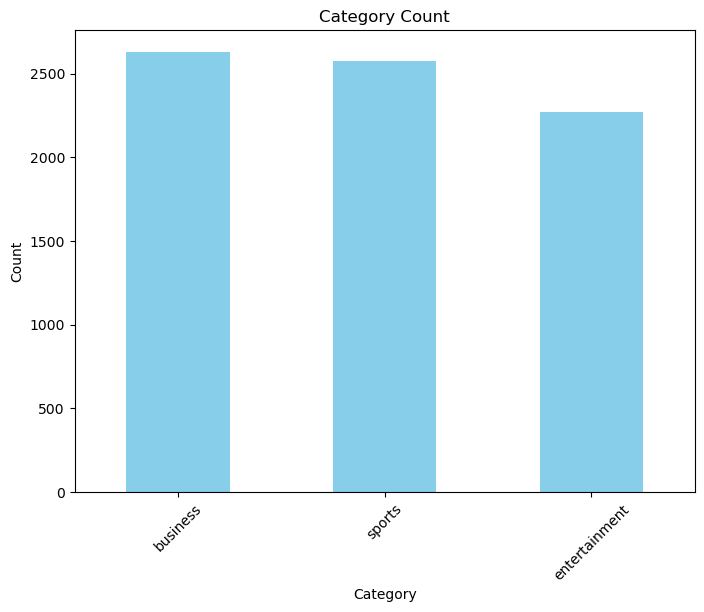

In [4]:
# Count the occurrences of each category
category_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count')
plt.xticks(rotation=45)
plt.show()

In [5]:
# remove punctuations from the text

def remove_punctuation(text):
    # punc = r'[।?,:;\'",.()\n&—‘’“”!-]'  
    punc = '''!()-[]{};:'"\,।<>./|?@#$%^&*_~'''
    for str in text:
        if str in punc:
            text = text.replace(str, "")
        
    return text

# Apply the function to remove punctuations from the 'Sentences' column
df['paras'] = df['paras'].apply(remove_punctuation)
print(df['paras'][0])

सागर ढकालले घातक बलिङ गरेपछि वाइवाइ ग्रेट हिमालय क्रिकेट एकेडेमी जीएचसीए ले खुकुरी च्यालेन्जर कप टान्टी–२० मा लगातार दोस्रो जित दर्ता गरेको छ  शनिबार पहिलो ब्याटिङ रोजेको इन्स्टिच्युट अफ इन्जिनियररिङ आईओई लाई ६२ रनमा रोक्ने क्रममा सागरले ४ ओभरमा १० रन खर्चेर ३ विकेट लिए 


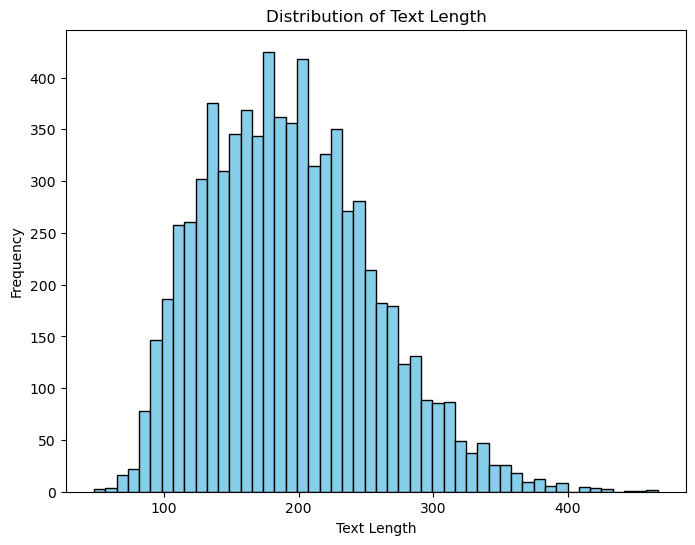

In [6]:

def dist_df(df):
    # Calculate text length and create a new column 'text_length'
    df['text_length'] = df['paras'].apply(len)
    
    # Plot the distribution of text length
    plt.figure(figsize=(8, 6))
    plt.hist(df['text_length'], bins=50,color='skyblue', edgecolor='black')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Text Length')
    plt.show()

dist_df(df)

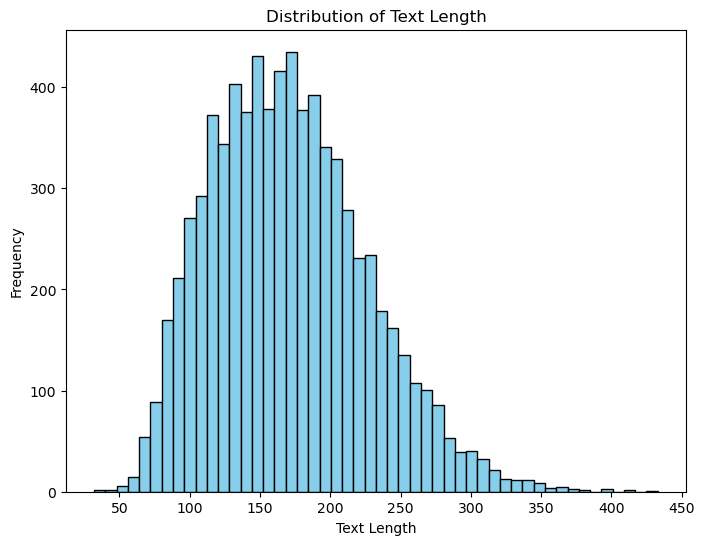

In [37]:
#remove nepali stopwords from the paragraph
def remove_stopwords(sentence):
    words = sentence.split()
    filtered_sentence = [word for word in words if word.lower() not in nepali_stopwords]
    return ' '.join(filtered_sentence)

# Create a new DataFrame with processed 'Sentences' (Nepali stopwords removed)
nepali_stopwords=['छ','र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको','आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ', 'जान', 'जाहिर', 'जे', 'जो',  'तदनुसार', 'तपाईको', 'तपाई', 'पर्याप्त','पहिल्यै',  'तापनी', 'तिनी', 'तिनीहरू', 'तिनीहरुको', 'तिनिहरुलाई', 'तिमी', 'तिर', 'तीन', 'तुरुन्तै', 'तेस्रो', 'तेस्कारण', 'पूर्व', 'प्रति', 'प्रतेक','फेरी', 'बने', 'त्सपछि', 'त्सैले', 'त्यहाँ', 'थिएन', 'दिनुभएको', 'दिनुहुन्छ', 'दुई', 'देखि', 'बरु', 'बारे', 'बाहिर', 'देखेको', 'देखेर', 'दोस्रो', 'धेरै', 'नजिकै', 'नत्र', 'नयाँ', 'निम्ति', 'बाहेक', 'बीच', 'बीचमा', 'भन', 'निम्न', 'निम्नानुसार', 'निर्दिष्ट', 'नौ', 'पक्का', 'पक्कै', 'पटक', 'पर्छ', 'पर्थ्यो', 'भन्छन्', 'भन्', 'भन्छु', 'भन्दा', 'भन्नुभयो', 'भर', 'भित्र', 'भित्री', 'म', 'मलाई', 'मात्र', 'माथि','मेरो', 'यति', 'यथोचित', 'यदि', 'यद्यपि', 'यसको', 'यसपछि', 'यसबाहेक', 'यसरी', 'यसो', 'यस्तो', 'यहाँ', 'यहाँसम्म', 'या', 'रही', 'राखे', 'लगभग', 'वरीपरी', 'वास्तवमा', 'बिरुद्ध', 'बिशेष', 'सायद', 'शायद', 'संग', 'संगै', 'सक्छ', 'सट्टा', 'सधै', 'सबै', 'सबैलाई', 'सम्म','साँच्चै', 'सात', 'साथ', 'साथै', 'हरे', 'हरेक']

new_df = df.copy()
new_df['paras'] = new_df['paras'].apply(remove_stopwords)
new_df.to_csv('final_df.csv', index=False)
dist_df(new_df)

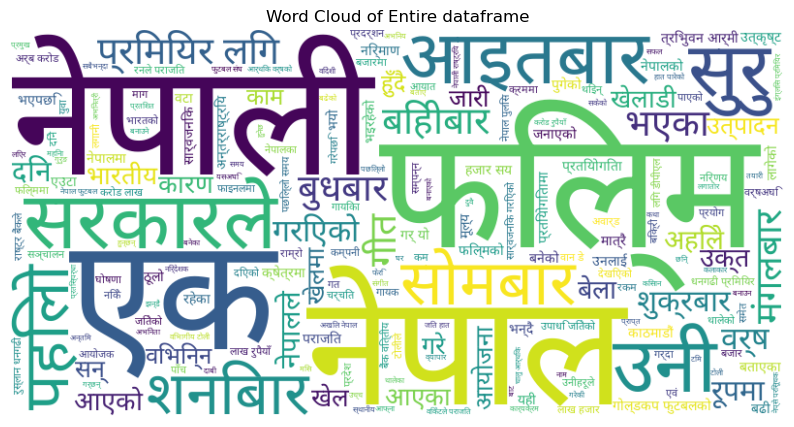

In [17]:
# Combine all the text data into a single string
text_data = ' '.join(new_df['paras'])
font = 'Mangal.ttf'

def generate_wordcloud(text_data, label = 'Entire dataframe'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font,regexp=r"[\u0900-\u097F]+").generate(text_data,)
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of '+label)
    plt.show()

generate_wordcloud(text_data)

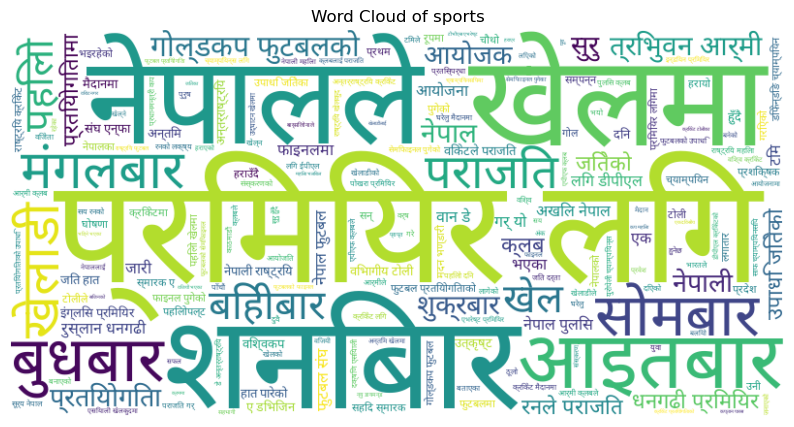

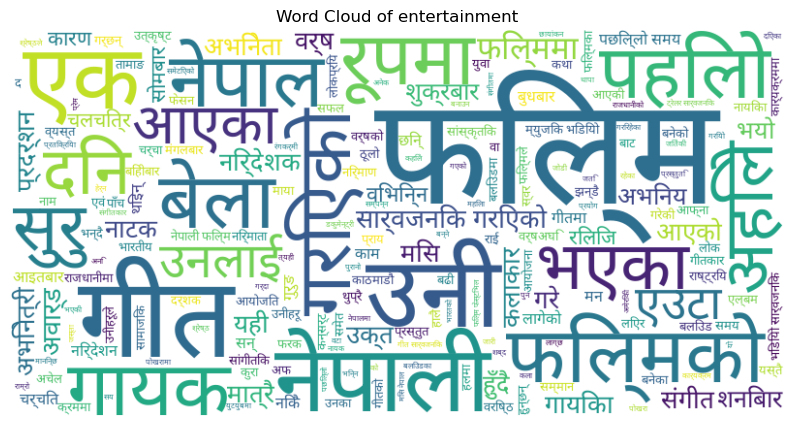

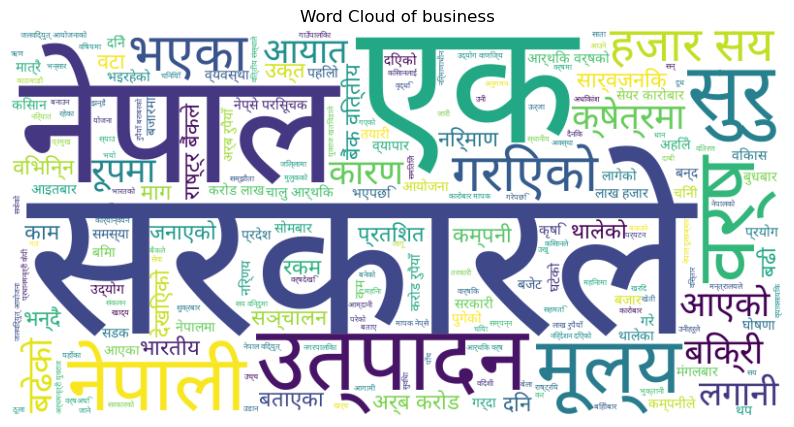

In [20]:
# Generate wordcloud for each category of data

sentiments = new_df['label'].unique()
for sentiment in sentiments:
    label_df =  new_df[new_df['label'] == sentiment]
    text_data = ' '.join(label_df['paras'])
    generate_wordcloud(text_data,sentiment)
    

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with a maximum of 500 features
max_features = 500
count_vectorizer = CountVectorizer(max_features=max_features)

# Extract the 'paras' column from the DataFrame
text_data = new_df['paras']

vectorized_features = count_vectorizer.fit_transform(text_data).toarray()
vectorized_df = pd.DataFrame(vectorized_features, columns=count_vectorizer.get_feature_names_out())
print(vectorized_df.head())

   अक  अख  अग  अघ  अच  अत  अद  अध  अन  अप  ...  २४  २५  २६  २७  २८  २९  ३०  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
2   0   0   0   1   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   ४०  ५०  ७०  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 500 columns]


In [26]:
from sklearn.model_selection import train_test_split

features = vectorized_df
labels = new_df['label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5976, 500)
X_test shape: (1494, 500)
y_train shape: (5976,)
y_test shape: (1494,)


In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Initialize Naive Bayes models
gaussian_nb_model = GaussianNB()
multinomial_nb_model = MultinomialNB()
bernoulli_nb_model = BernoulliNB()

# Train the models on the training data
gaussian_nb_model.fit(X_train, y_train)
multinomial_nb_model.fit(X_train, y_train)
bernoulli_nb_model.fit(X_train, y_train)


accuracy_gaussian = gaussian_nb_model.score(X_test, y_test)
accuracy_multinomial = multinomial_nb_model.score(X_test, y_test)
accuracy_bernoulli = bernoulli_nb_model.score(X_test, y_test)

# Print a message indicating that the models have been trained
print("Naive Bayes models trained successfully.")

Naive Bayes models trained successfully.


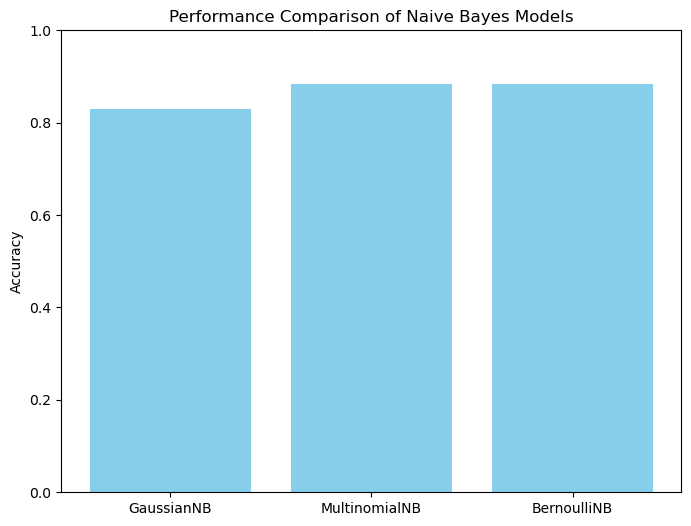

Accuracy (GaussianNB): 0.83
Accuracy (MultinomialNB): 0.88
Accuracy (BernoulliNB): 0.88


In [29]:
# Data for plotting
models = ['GaussianNB', 'MultinomialNB', 'BernoulliNB']
accuracies = [accuracy_gaussian, accuracy_multinomial, accuracy_bernoulli]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Naive Bayes Models')
plt.ylim(0, 1)  

print(f'Accuracy (GaussianNB): {accuracy_gaussian:.2f}')
print(f'Accuracy (MultinomialNB): {accuracy_multinomial:.2f}')
print(f'Accuracy (BernoulliNB): {accuracy_bernoulli:.2f}')

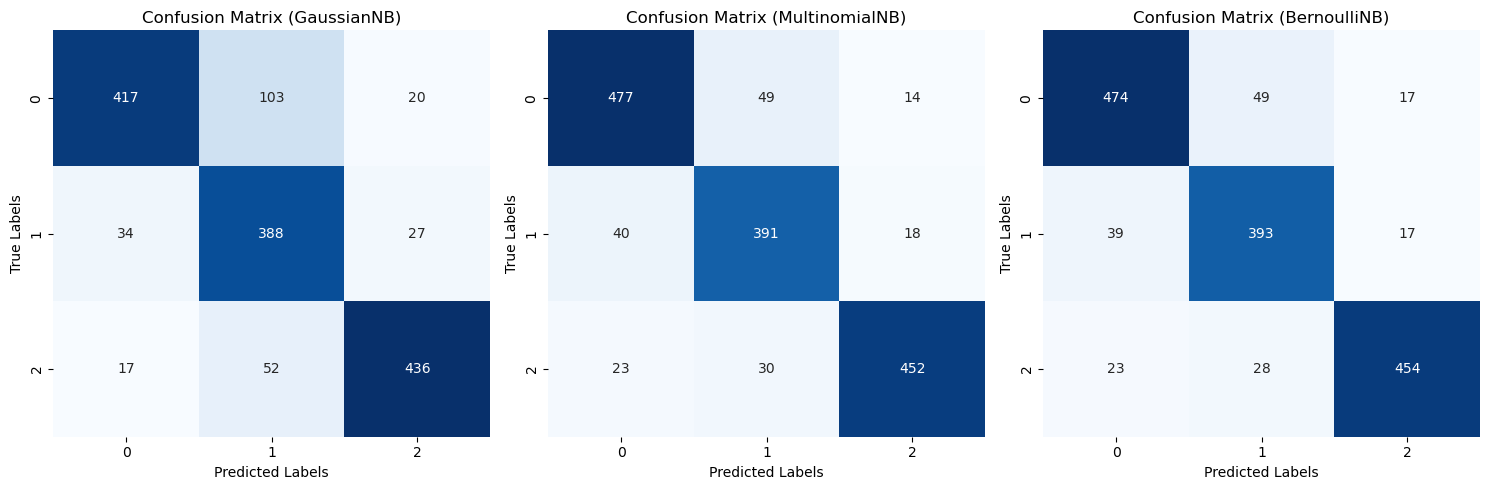

In [35]:

predictions_gaussian = gaussian_nb_model.predict(X_test)
predictions_multinomial = multinomial_nb_model.predict(X_test)
predictions_bernoulli = bernoulli_nb_model.predict(X_test)

conf_matrix_gaussian = confusion_matrix(y_test, predictions_gaussian)
conf_matrix_multinomial = confusion_matrix(y_test, predictions_multinomial)
conf_matrix_bernoulli = confusion_matrix(y_test, predictions_bernoulli)

# Plot confusion matrices
plt.figure(figsize=(15, 5))

# GaussianNB Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_gaussian, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (GaussianNB)')

# MultinomialNB Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_multinomial, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (MultinomialNB)')

# BernoulliNB Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_bernoulli, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (BernoulliNB)')

plt.tight_layout()
plt.show()